# Using Lotka-Volterra Equations to Simulate a Stochastic Prey-Predator System

#### The Lotka-Volterra equations describe how a prey and predator in a simplified chain impact the populations of the other. However, with the equations alone, you can only have a deterministic simulation, which does not account for external forces and impacts. For this, the simulation is turned stochastic through the process below.

#### In a dynamical analysis, the equations are as follow:
$$\frac{dx}{dt}=\alpha x - \beta xy$$

$$\frac{dy}{dt}=\lambda xy - \theta y$$

### First, import all libraries needed

In [49]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np
import random

### Set the timestep for each point in the simulation, the amplitude of the noise term, the time at which you wish the simulation to end and define the variables that represent the prey and the predator

In [50]:
timestep = 0.001
# amplitude of noise term
amp = 0.01
# end time of the simulation
end_time = 100

# creates a time vector from 0 to end_time, seperated by a timestep
t = np.arange(0,end_time,timestep)

# populations (vectors) preys(x) e predators(y)
x = []
y = []

### Define the Stochastic Term to be added to the parameters and the parameters of the equations

In [51]:
# noise term to perturb differential equations
def StochasticTerm(amp):
    return (amp * random.uniform(-1,1))


"""" lotka-volterra parameters """
# Birth rate of prey --> alpha
a = 1
# death rate of prey due to predation --> beta
b = 0.1
# natural death rate of predator --> lambda
c = 0.5
# conversion factor of prey into predator --> theta
d = 0.02

### Define the size of the initial populations

#### Note that the model as defined before is deterministic, not stochastic. For this, the amplitude term must be added to the terms

In [52]:
#initial conditions of prey (x) and predadtor (y) populations
x.append(10)
y.append(5)


#adding the noise to make the simulation stochastic

for index in range(1, len(t)):
    
    xd = x[index-1] * (a - b*y[index-1])
    yd = -y[index-1]*(c - d*x[index-1])
    
    next_x = x[index-1] + xd * timestep
    next_y = y[index-1] + yd * timestep
    
    x.append(next_x + StochasticTerm(amp))
    y.append(next_y + StochasticTerm(amp))

### With the results, graph both the populations of x and y as well as the phase space of these populations

#### Note that I also included the variation in the amplitude term, you may do this if you wish

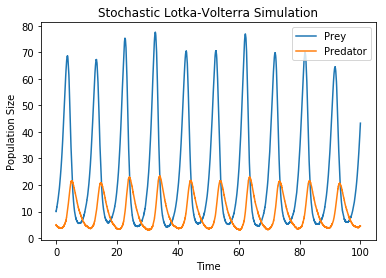

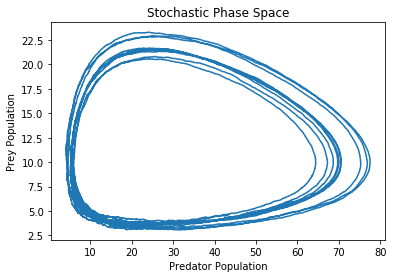

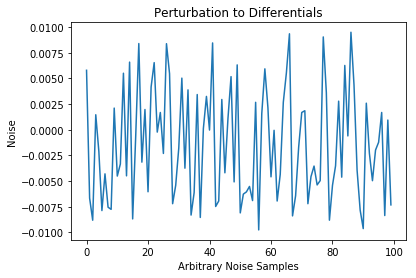

In [55]:
plt.plot(t, x)
plt.plot(t, y)
plt.xlabel('Time')
plt.ylabel('Population Size')
plt.legend(('Prey', 'Predator'))
plt.title('Stochastic Lotka-Volterra Simulation')
plt.show()

plt.plot(x,y)
plt.xlabel('Predator Population')
plt.ylabel('Prey Population')
plt.title('Stochastic Phase Space')
plt.show()

# noise term visualization
noise = []
n =[]
for sample in range(100):
    noise.append(StochasticTerm(amp))
    n.append(sample)

plt.plot(n, noise)
plt.xlabel('Arbitrary Noise Samples')
plt.ylabel('Noise')
plt.title('Perturbation to Differentials')
plt.show()
    